In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
!mkdir -p /content/drive/MyDrive/BrainTumorDetection


In [5]:
from google.colab import files
uploaded = files.upload()


Saving brain_tumor_dataset.zip to brain_tumor_dataset.zip


In [6]:
import zipfile
import os

zip_path = "/content/brain_tumor_dataset.zip"
extract_path = "/content/brain_tumor_dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List folders
os.listdir(extract_path)


['yes', 'brain_tumor_dataset', 'no']

In [8]:
dataset_path = "/content/brain_tumor_dataset/brain_tumor_dataset"


In [9]:
import os

print("Classes:", os.listdir(dataset_path))  # Should print: ['yes', 'no']
print("Yes samples:", len(os.listdir(os.path.join(dataset_path, 'yes'))))
print("No samples:", len(os.listdir(os.path.join(dataset_path, 'no'))))


Classes: ['yes', 'no']
Yes samples: 155
No samples: 98


In [10]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Set image size
IMG_SIZE = 128

# Initialize
X = []
y = []

# Load images
for label in ['yes', 'no']:
    path = os.path.join(dataset_path, label)
    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            X.append(img)
            y.append(1 if label == 'yes' else 0)

# Convert to arrays
X = np.array(X)
y = np.array(y)

# Normalize pixel values (0 to 1)
X = X / 255.0

# Split dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)


Train shape: (202, 128, 128, 3)
Validation shape: (51, 128, 128, 3)


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(X_train, y_train,
                    epochs=15,
                    batch_size=16,
                    validation_data=(X_val, y_val))


Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 736ms/step - accuracy: 0.6518 - loss: 0.6391 - val_accuracy: 0.6667 - val_loss: 0.6124
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 584ms/step - accuracy: 0.7936 - loss: 0.5234 - val_accuracy: 0.8039 - val_loss: 0.5592
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 508ms/step - accuracy: 0.7865 - loss: 0.4573 - val_accuracy: 0.7843 - val_loss: 0.5443
Epoch 4/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 712ms/step - accuracy: 0.7838 - loss: 0.4793 - val_accuracy: 0.8039 - val_loss: 0.5407
Epoch 5/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 524ms/step - accuracy: 0.8121 - loss: 0.4368 - val_accuracy: 0.7843 - val_loss: 0.5303
Epoch 6/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 695ms/step - accuracy: 0.8220 - loss: 0.4259 - val_accuracy: 0.7255 - val_loss: 0.5356
Epoch 7/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 523ms/step - accuracy: 0.7687 - loss: 0.4705 - val_accuracy: 0.7451 - val_loss: 0.5368
Epoch 8/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 724ms/step - accuracy: 0.8783 - loss: 0.3384 - val_accuracy: 0

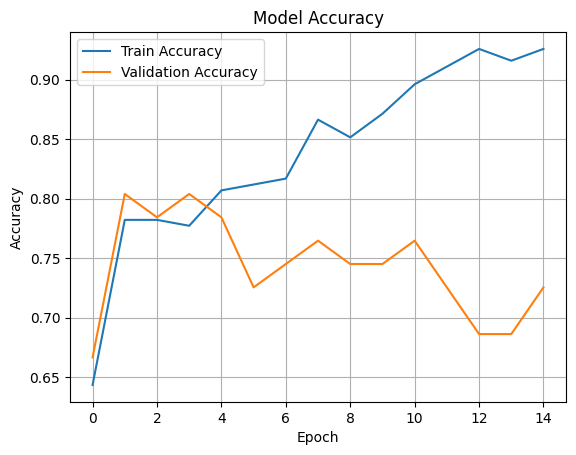

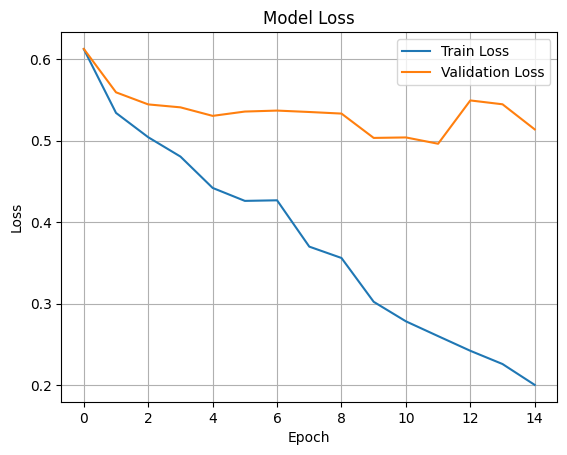

In [13]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 312ms/step


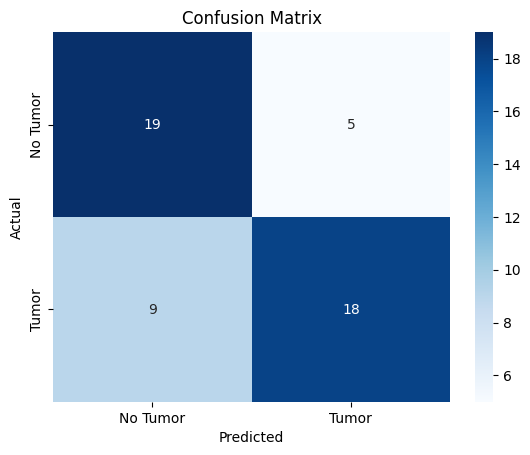

              precision    recall  f1-score   support

    No Tumor       0.68      0.79      0.73        24
       Tumor       0.78      0.67      0.72        27

    accuracy                           0.73        51
   macro avg       0.73      0.73      0.73        51
weighted avg       0.73      0.73      0.73        51



In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predict on validation set
y_pred = model.predict(X_val)
y_pred_labels = (y_pred > 0.5).astype(int).flatten()

# Confusion matrix
cm = confusion_matrix(y_val, y_pred_labels)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Tumor', 'Tumor'], yticklabels=['No Tumor', 'Tumor'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_val, y_pred_labels, target_names=['No Tumor', 'Tumor']))


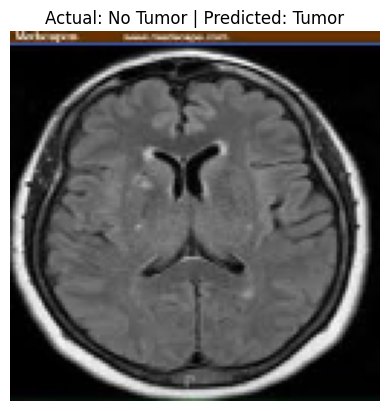

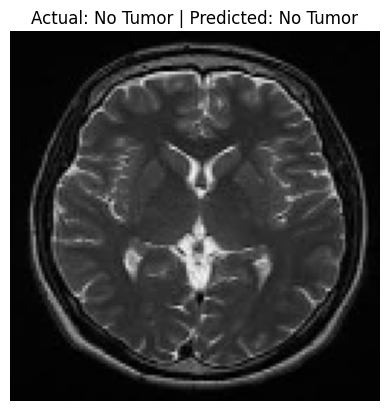

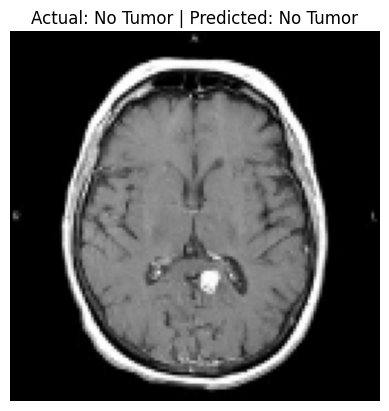

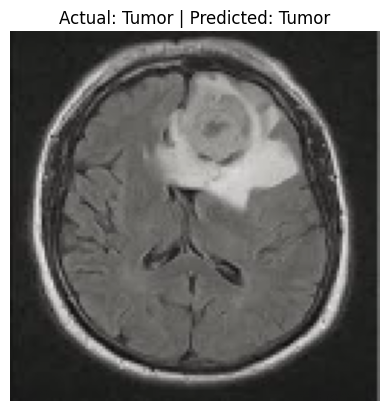

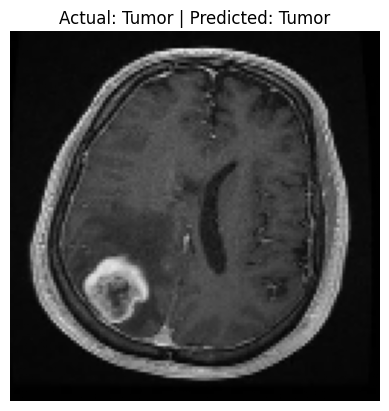

In [15]:
import random

indices = random.sample(range(len(X_val)), 5)
for i in indices:
    img = X_val[i]
    true_label = y_val[i]
    pred_label = int(y_pred_labels[i])

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Actual: {'Tumor' if true_label else 'No Tumor'} | Predicted: {'Tumor' if pred_label else 'No Tumor'}")
    plt.show()


In [16]:
model.save('/content/drive/MyDrive/BrainTumorDetection/brain_tumor_model.h5')
print("Model saved to Google Drive.")


Model saved to Google Drive.
